In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
#all_drop_exp.csvを読み込む
df_all_drop_exp = pd.read_csv('all_drop_exp.csv')
df_all_drop_exp[10:14]

,Unnamed: 0,d1,d2,d3,d4,d5,w1,w2,w3,w4,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
10,13,3.5283,2.3139,3.2333,4.18517,5.23090,22.70920,15.76695,15.72699,15.66040,...,30,19,23,15,3,2.7333,2.9444,3.0000,3.0000,3.2889
11,14,3.2080,2.3115,7.6254,5.64190,7.59495,31.81118,27.72612,21.77918,20.69237,...,22,19,14,10,4,1.9778,3.5333,2.8556,3.0000,3.3889
12,15,7.1979,3.1578,5.4769,4.67814,7.07351,25.68948,17.77610,16.78791,17.17793,...,32,20,13,14,3,3.0000,3.0556,3.1111,3.6111,3.3778
13,16,4.7634,1.7512,3.5468,3.75658,5.80966,28.51113,12.42138,12.92084,10.67754,...,40,16,16,12,5,2.5778,3.3222,3.5444,3.3111,3.5333


In [3]:
df_all_drop_s = df_all_drop_exp[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
new_column_names = {'none_s': '提示なし','image_s': '画像のみ', 'announce_s': '音声のみ','image_sound_s': '画像+報知音', 'image_announce_s': '画像+音声'}

df_all_drop_s = df_all_drop_s.rename(columns=new_column_names)
#df_all_drop_sに関して，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の最大値を持つカラム名をカラムとして追加
df_all_drop_s_max = df_all_drop_s.idxmax(axis=1)
df_all_drop_s_max.describe()

count       684
unique        5
top       画像+音声
freq        271
dtype: object

In [4]:
#df_all_drop_s_maxの要素の個数をカウント
df_all_drop_s_max_count = df_all_drop_s_max.value_counts()
df_all_drop_s_max_count

画像+音声     271
音声のみ      202
画像+報知音    108
画像のみ       90
提示なし       13
Name: count, dtype: int64

In [7]:
#画像のみの人を表示
df_image = df_all_drop_s[df_all_drop_s_max == '画像のみ']
df_image

,提示なし,画像のみ,音声のみ,画像+報知音,画像+音声
11,1.9778,3.5333,2.8556,3.0000,3.3889
16,2.3333,4.4333,3.6667,4.3222,4.2111
18,2.4667,3.6222,3.1222,3.1222,3.5889
28,3.0444,3.7111,3.3000,3.3000,3.1778
30,3.2667,3.4556,3.2444,2.6111,3.3222
...,...,...,...,...,...
624,3.7222,3.9444,3.6667,3.2444,3.7778
634,1.9667,4.8889,4.2667,4.1778,4.7778
643,2.4667,4.7778,4.7667,3.0000,4.7222
677,2.3333,4.4556,3.9444,4.0889,4.1000


In [167]:
#df_all_drop_s_maxをone-hotエンコーディング
df_all_drop_s_max_one_hot = pd.get_dummies(df_all_drop_s_max).astype(int)
df_all_drop_s_max_one_hot

,提示なし,画像+報知音,画像+音声,画像のみ,音声のみ
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
679,0,0,1,0,0
680,1,0,0,0,0
681,0,0,0,0,1
682,0,0,0,1,0


In [168]:
df_all_drop_exp.columns

Index(['Unnamed: 0', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s'],
      dtype='object')

In [169]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
y = df_all_drop_s_max_one_hot

In [197]:
#yの要素の個数をカウント
y_count = y.sum()  
y_count


提示なし       13
画像+報知音    108
画像+音声     271
画像のみ       90
音声のみ      202
dtype: int64

In [170]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

,提示なし,画像+報知音,画像+音声,画像のみ,音声のみ
439,0,0,0,0,1
257,0,0,1,0,0
558,0,0,1,0,0
587,0,0,0,0,1
18,0,0,0,1,0
...,...,...,...,...,...
71,0,1,0,0,0
106,0,0,1,0,0
270,0,1,0,0,0
435,0,0,0,0,1


In [171]:








# 特徴量の標準化を含むパイプラインの構築
scaler = StandardScaler()
clf = RandomForestClassifier(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('classifier', clf)
])

# モデルのトレーニング
pipeline.fit(X_train, y_train)

# 予測と評価
y_pred = pipeline.predict(X_test)

# # y_test と y_pred を再度エンコード解除して比較
# y_test_labels = encoder.inverse_transform(y_test)
# y_pred_labels = encoder.inverse_transform(y_pred)

# print(classification_report(y_test_labels, y_pred_labels))
# print('Accuracy:', accuracy_score(y_test_labels, y_pred_labels))

print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        18
           2       0.56      0.15      0.24        60
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        42

   micro avg       0.41      0.07      0.11       137
   macro avg       0.11      0.03      0.05       137
weighted avg       0.25      0.07      0.10       137
 samples avg       0.07      0.07      0.07       137

Accuracy: 0.06569343065693431


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


参考文献　機械学習：https://qiita.com/hikaru_/items/3d64af35769235471d9c

In [172]:
# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']
# target = ['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']  

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

#ここから学習用データとテスト用データに分ける。random_stateは乱数を固定
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [173]:
df_all_drop_s_max

0       音声のみ
1      画像+音声
2       音声のみ
3      画像+音声
4      画像+音声
       ...  
679    画像+音声
680     提示なし
681     音声のみ
682     画像のみ
683     音声のみ
Length: 684, dtype: object

In [174]:
# # k-近傍法（k-NN）
# from sklearn.neighbors import KNeighborsClassifier

# #k-NNインスタンス。今回は3個で多数決。3の値を変更して色々試すと〇
# model = KNeighborsClassifier(n_neighbors=3)
# #学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
# model.fit(X_train, y_train)

# # .scoreで正解率を算出。
# print("train score:",model.score(X_train,y_train))
# print("test score:",model.score(X_test,y_test))

In [175]:
# 決定木
from sklearn.tree import DecisionTreeClassifier

# 決定木インスタンス(木の深さ3)
model = DecisionTreeClassifier(max_depth=3)
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.46393762183235865
test score: 0.36257309941520466


In [176]:
# サポートベクターマシン（SVM）
from sklearn.svm import LinearSVC

# SVMインスタンス
model = LinearSVC()
#学習モデル構築。引数に訓練データの特徴量と、それに対応したラベル
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

train score: 0.36062378167641324
test score: 0.3216374269005848


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [177]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# # ターゲットを数値ラベルに変換
# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(max_iter=10000)

#グリッドサーチ
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')






/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.001}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


train score: 0.43875685557586835
test score: 0.3284671532846715
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.17      0.11      0.13        19
       画像+音声       0.35      0.61      0.45        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.35      0.24      0.29        49

    accuracy                           0.33       137
   macro avg       0.17      0.19      0.17       137
weighted avg       0.28      0.33      0.29       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


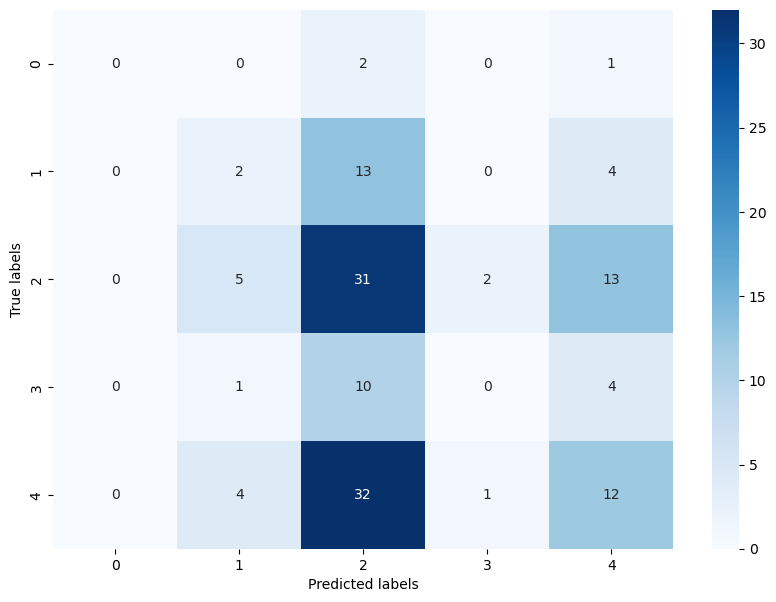

In [178]:
#最適なパラメータを使ってモデルを再構築
model = LinearSVC(C=0.001, max_iter=10000)
model.fit(X_train, y_train)

# .scoreで正解率を算出。
print("train score:",model.score(X_train,y_train))
print("test score:",model.score(X_test,y_test))

#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm =confusion_matrix(y_test, y_pred)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



# ヒートマップの描画
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# #特徴量の重要度
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# plt.figure(figsize=(10, 7))
# plt.barh(range(len(importances)), importances[indices], align='center')
# plt.yticks(range(len(importances)), np.array(features)[indices])
# plt.show()

# # 特徴量の重要度を表示
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# for i in range(len(importances)):
#     print(f'{features[i]}: {importances[i]}')
    

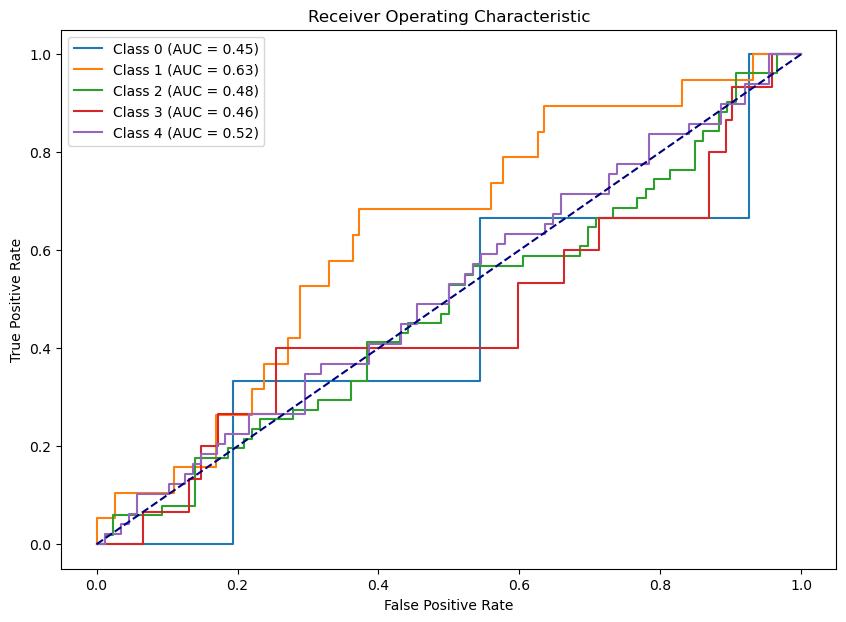

In [179]:
#AUC曲線
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# ターゲットをone-hotエンコーディング
Y = label_binarize(Y, classes=[0, 1, 2, 3, 4])
n_classes = Y.shape[1]

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(C=0.001, max_iter=10000)

# OneVsRestClassifierで多クラス分類
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# ROC曲線を描画
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# # 特徴量の重要度を表示
# importances = model.coef_
# importances = importances.reshape(-1)
# indices = np.argsort(importances)

# for i in range(len(importances)):
#     print(f'{features[i]}: {importances[i]}')

In [180]:
#xgboostを使用
import xgboost as xgb
from sklearn.metrics import accuracy_score

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# モデルの構築
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 正解率の算出
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ラベルのエンコードを元に戻す
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

#各ラベルの値を確認
print(label_encoder.classes_)


Accuracy: 0.29927007299270075
[[ 0  0  2  1  0]
 [ 0  2 10  0  7]
 [ 0  4 27  2 18]
 [ 0  1 11  1  2]
 [ 0  3 32  3 11]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      0.11      0.14        19
           2       0.33      0.53      0.41        51
           3       0.14      0.07      0.09        15
           4       0.29      0.22      0.25        49

    accuracy                           0.30       137
   macro avg       0.19      0.19      0.18       137
weighted avg       0.27      0.30      0.27       137

['提示なし' '画像+報知音' '画像+音声' '画像のみ' '音声のみ']


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
#パラメータの調整
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータの設定
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# グリッドサーチ
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')

#最適なパラメータを使ってモデルを再構築
model = xgb.XGBClassifier(**grid_search.best_params_)
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# 正解率の算出
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.32116788321167883
[[ 0  0  3  0  0]
 [ 0  0 12  0  7]
 [ 0  4 35  1 11]
 [ 0  0 12  0  3]
 [ 0  2 37  1  9]]
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.00      0.00      0.00        19
       画像+音声       0.35      0.69      0.47        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.30      0.18      0.23        49

    accuracy                           0.32       137
   macro avg       0.13      0.17      0.14       137
weighted avg       0.24      0.32      0.26       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=label_encoder.classes_))


[[ 0  0  3  0  0]
 [ 0  0 12  0  7]
 [ 0  4 35  1 11]
 [ 0  0 12  0  3]
 [ 0  2 37  1  9]]
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.00      0.00      0.00        19
       画像+音声       0.35      0.69      0.47        51
        画像のみ       0.00      0.00      0.00        15
        音声のみ       0.30      0.18      0.23        49

    accuracy                           0.32       137
   macro avg       0.13      0.17      0.14       137
weighted avg       0.24      0.32      0.26       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 25552 (\N{CJK UNIFIED IDEOGRAPH-63D0}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.dra

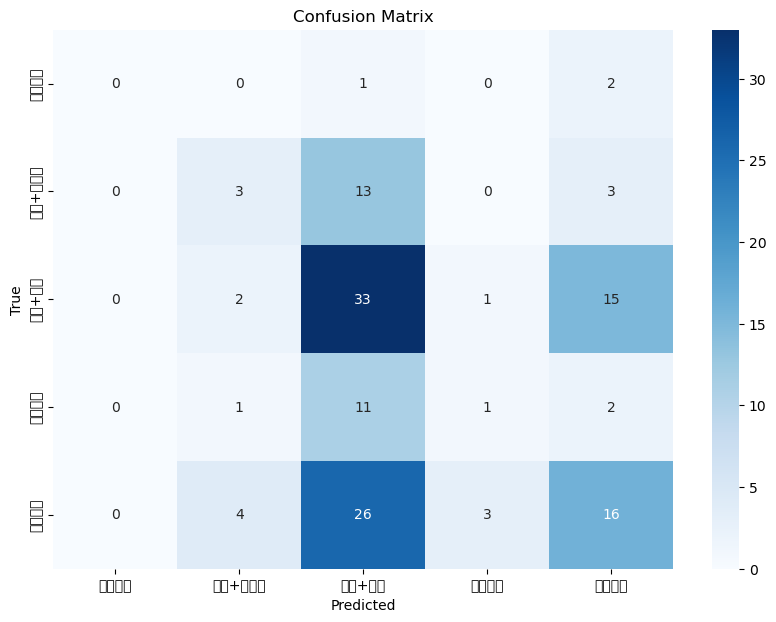

In [183]:

# 混同行列のプロット
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [184]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# # ターゲットを数値ラベルに変換
# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVMインスタンス
model = LinearSVC(max_iter=10000)

#グリッドサーチ
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print(f'Best parameters: {grid_search.best_params_}')




/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters: {'C': 0.001}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


参考文献　グリッドサーチ：https://qiita.com/WealthyFirst/items/c81f7cea72a44a7bfd3a

In [185]:
# tuned_parameters = [
#     {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#     {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
#     {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
#     ]
# score = 'f1'
# clf = GridSearchCV(
#     SVC(), # 識別器
#     tuned_parameters, # 最適化したいパラメータセット 
#     cv=5, # 交差検定の回数
#     scoring='%s_weighted' % score ) # モデルの評価関数の指定

In [186]:
# クロスバリデーションでモデルの評価
scores = cross_val_score(model, X_train, y_train, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Average cross-validation score: {scores.mean()}')

# 最終的なモデルの学習
model.fit(X_train, y_train)

# 訓練データとテストデータでのスコアを表示
print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

Cross-validation scores: [0.37272727 0.30909091 0.3853211  0.34862385 0.3853211 ]
Average cross-validation score: 0.36021684737281073
train score: 0.43144424131627057
test score: 0.35766423357664234


In [187]:
# !pip install tensorflow

In [188]:
X_train.shape[1]

17

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルの訓練
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1273 - loss: 1.7402 - val_accuracy: 0.2636 - val_loss: 1.5621
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3231 - loss: 1.5347 - val_accuracy: 0.3182 - val_loss: 1.5236
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3998 - loss: 1.4254 - val_accuracy: 0.3455 - val_loss: 1.5212
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.4366 - loss: 1.3611 - val_accuracy: 0.3455 - val_loss: 1.5215
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4055 - loss: 1.3599 - val_accuracy: 0.3091 - val_loss: 1.5234
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4300 - loss: 1.3172 - val_accuracy: 0.3182 - val_loss: 1.5259
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4706 - loss: 1.2848 - val_accuracy: 0.3364 - val_loss: 1.5221
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4426 - loss: 1.2738 - val_accuracy: 0.3091 - val_loss: 1.5239
E

Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2471 - loss: 1.6792 - val_accuracy: 0.1727 - val_loss: 1.6404
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3096 - loss: 1.5503 - val_accuracy: 0.2182 - val_loss: 1.5665
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3867 - loss: 1.4419 - val_accuracy: 0.2545 - val_loss: 1.5324
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4030 - loss: 1.3790 - val_accuracy: 0.2727 - val_loss: 1.5134
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.4092 - loss: 1.3344 - val_accuracy: 0.2636 - val_loss: 1.5040
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4215 - loss: 1.3321 - val_accuracy: 0.2545 - val_loss: 1.5012
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4134 - loss: 1.2948 - val_accuracy: 0.2727 - val_loss: 1.5014
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.4197 - loss: 1.3043 - val_accuracy: 0.2727 - val_loss:

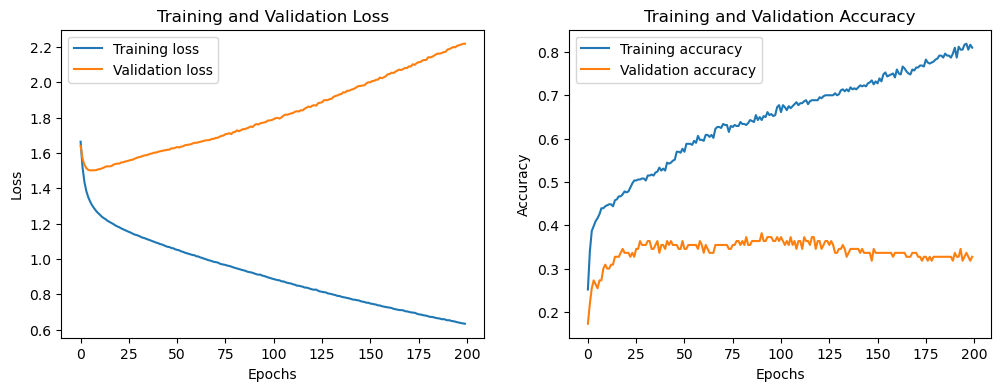

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 訓練パラメータ
epochs = 200
batch_size = 32

# モデルの訓練
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 学習過程のプロット
# 訓練と検証の損失をプロット
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2287 - loss: 1.7178 - val_accuracy: 0.2045 - val_loss: 1.5824
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3178 - loss: 1.5849 - val_accuracy: 0.3409 - val_loss: 1.5130
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3908 - loss: 1.4702 - val_accuracy: 0.3864 - val_loss: 1.4810
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3748 - loss: 1.4457 - val_accuracy: 0.3636 - val_loss: 1.4673
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3820 - loss: 1.3676 - val_accuracy: 0.3636 - val_loss: 1.4606
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4157 - loss: 1.3559 - val_accuracy: 0.3636 - val_loss: 1.4532
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4300 - loss: 1.3552 - val_accuracy: 0.3750 - val_loss: 1.4445
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4245 - loss: 1.3361 - val_accuracy: 0.3750 - val_loss: 1.4

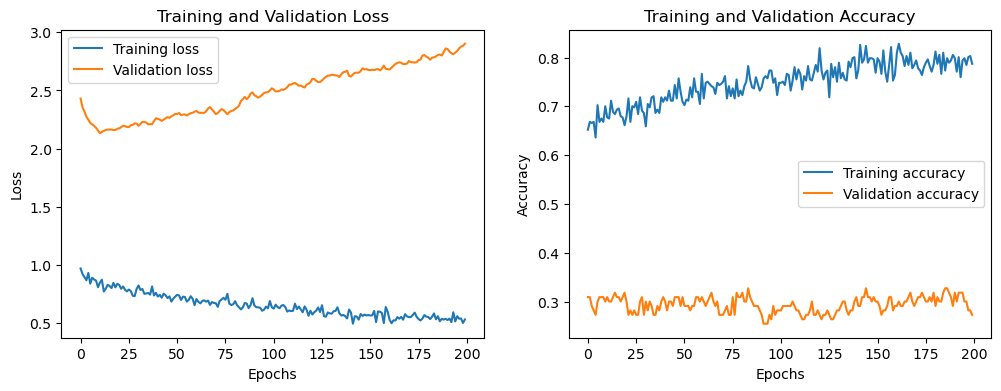

In [191]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# 特徴量とターゲット変数の設定
features = ['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4', 'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p']

# 特徴量とターゲットの抽出
X = df_all_drop_exp[features]
Y = df_all_drop_s_max

# ターゲットを数値ラベルに変換
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# データを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 特徴量を標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 交差検証の設定
fold_num = 5
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=fold_num, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X_train, y_train):
    # モデルの定義
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='softmax'))

    # モデルのコンパイル
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    history = model.fit(X_train[train], y_train[train], epochs=200, batch_size=32, validation_split=0.2, verbose=1)

    # 評価
    scores = model.evaluate(X_train[test], y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# モデルの最終訓練
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 学習過程のプロット
plt.figure(figsize=(12, 4))

# 訓練と検証の損失をプロット
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# 訓練と検証の精度をプロット
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.3548 - loss: 2.3561
Test loss: 2.208155393600464
Test accuracy: 0.37956205010414124


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

        提示なし       0.00      0.00      0.00         3
      画像+報知音       0.12      0.11      0.11        19
       画像+音声       0.44      0.49      0.46        51
        画像のみ       0.17      0.13      0.15        15
        音声のみ       0.44      0.47      0.46        49

    accuracy                           0.38       137
   macro avg       0.23      0.24      0.24       137
weighted avg       0.36      0.38      0.37       137



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/seaborn/

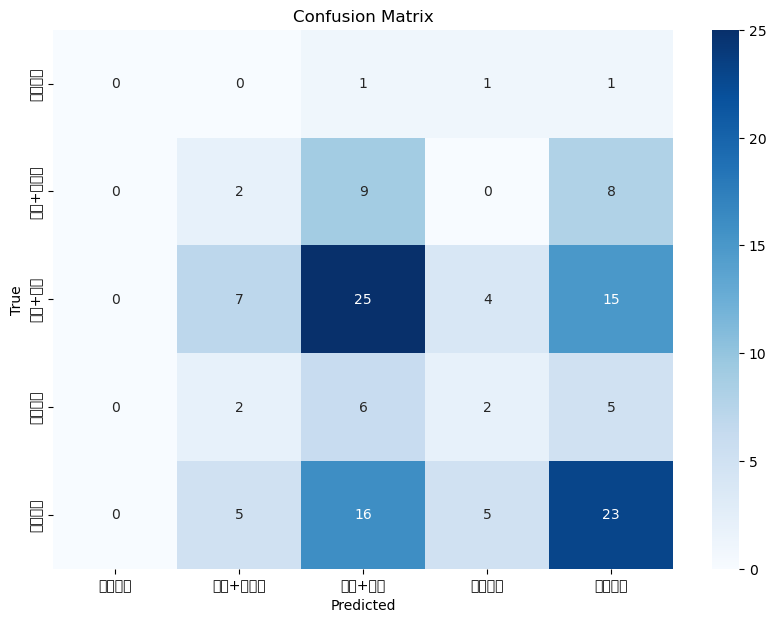

In [192]:
from sklearn.metrics import confusion_matrix, classification_report

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 予測を実行
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

# 混同行列の生成
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 各クラスごとの精度を含むレポートの表示
class_report = classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_)
print(class_report)

# 混同行列のプロット
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [195]:
#class_reportをファイルに出力
with open('class_report.txt', 'w') as f:
    f.write(class_report)



'              precision    recall  f1-score   support\n\n        提示なし       0.00      0.00      0.00         3\n      画像+報知音       0.12      0.11      0.11        19\n       画像+音声       0.44      0.49      0.46        51\n        画像のみ       0.17      0.13      0.15        15\n        音声のみ       0.44      0.47      0.46        49\n\n    accuracy                           0.38       137\n   macro avg       0.23      0.24      0.24       137\nweighted avg       0.36      0.38      0.37       137\n'

In [193]:
# !pip install xgboost

In [196]:
# #class_reportをエクセルファイルに出力
# import openpyxl

# # ワークブックを作成
# wb = openpyxl.Workbook()
# ws = wb.active
# ws.title = 'classification_report'

# # classification_reportの内容をセルに書き込む
# for i, line in enumerate(class_report.split('\n')):
#     for j, value in enumerate(line.split()):
#         ws.cell(row=i+1, column=j+1, value=value)

# # ファイルを保存
# wb.save('classification_report.xlsx')

# # ワークブックを閉じる
# wb.close()
